<a href="https://colab.research.google.com/github/Geekrish26/Walmart-casestudy/blob/main/Walmart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement :
Walmart Inc. wants to analyze customer purchase behavior during
Black Friday to enable data-driven decision-making.

The key objective is to study the relationship between customer gender and purchase amount.

The business wants to understand whether male and female customers exhibit different spending patterns during the sale period.

It is assumed that the customer base consists of 50 million male and 50 million female customers.

The goal is to determine whether there is a statistically significant difference in average spending between the two genders.

# Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Loading files

In [3]:
df = pd.read_csv("walmart_data.csv")

# Data Exploring

In [6]:
df.shape

(550068, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
df.duplicated().sum()

np.int64(0)

# Analyzing the gender column

In [10]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [11]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
M,0.753105
F,0.246895


In [12]:
df.groupby('Gender')['User_ID'].nunique()

,User_ID
Gender,
F,1666
M,4225


In [13]:
df.groupby('Gender')['Purchase'].describe().T

Gender,F,M
count,135809.000000,414259.00000
mean,8734.565765,9437.52604
std,4767.233289,5092.18621
min,12.000000,12.00000
25%,5433.000000,5863.00000
50%,7914.000000,8098.00000
75%,11400.000000,12454.00000
max,23959.000000,23961.00000


<Axes: xlabel='Gender', ylabel='Purchase'>

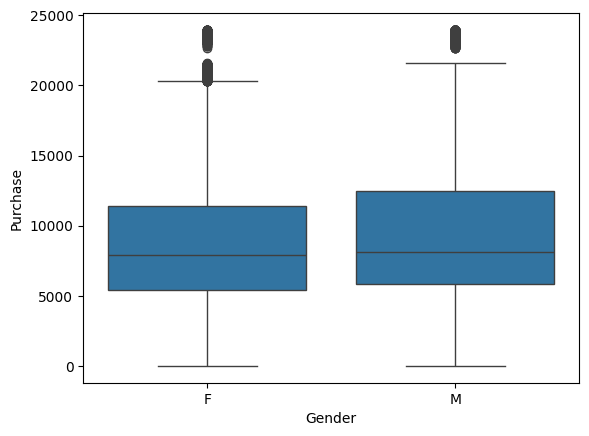

In [14]:
sns.boxplot(x='Gender', y='Purchase', data=df)

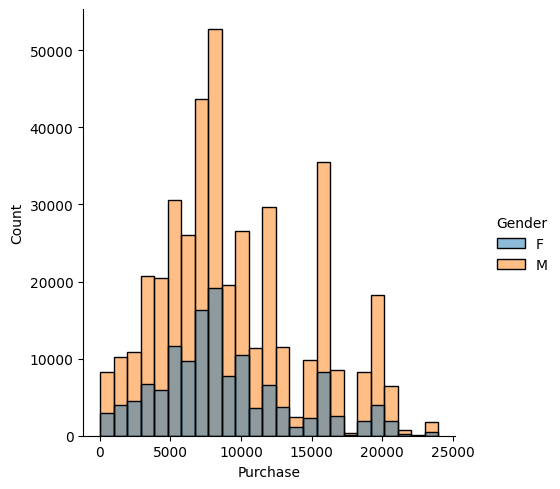

In [18]:
sns.displot(df, x='Purchase', hue='Gender',bins=25)

# Central Limit Theorm



In [22]:
male_sample_mean = [df[df['Gender'] == 'M']['Purchase'].sample(30000).mean() for i in range(1000)]
female_sample_mean = [df[df['Gender'] == 'F']['Purchase'].sample(30000).mean() for i in range(1000)]

In [23]:
male_sample_mean

[np.float64(9474.9392),
 np.float64(9435.446266666666),
 np.float64(9437.183966666667),
 np.float64(9429.431233333333),
 np.float64(9437.709266666667),
 np.float64(9380.2266),
 np.float64(9450.936433333334),
 np.float64(9454.483866666667),
 np.float64(9436.5518),
 np.float64(9421.028533333334),
 np.float64(9439.076733333333),
 np.float64(9457.0262),
 np.float64(9376.847),
 np.float64(9396.6277),
 np.float64(9442.937766666666),
 np.float64(9441.7574),
 np.float64(9460.767933333333),
 np.float64(9435.251733333333),
 np.float64(9426.337366666667),
 np.float64(9480.208933333333),
 np.float64(9467.652133333333),
 np.float64(9396.426933333334),
 np.float64(9418.574),
 np.float64(9449.442933333334),
 np.float64(9476.093766666667),
 np.float64(9442.5007),
 np.float64(9416.142866666667),
 np.float64(9469.070166666666),
 np.float64(9430.5715),
 np.float64(9446.2122),
 np.float64(9396.6633),
 np.float64(9477.4146),
 np.float64(9488.8347),
 np.float64(9473.0593),
 np.float64(9489.364966666666),
 n

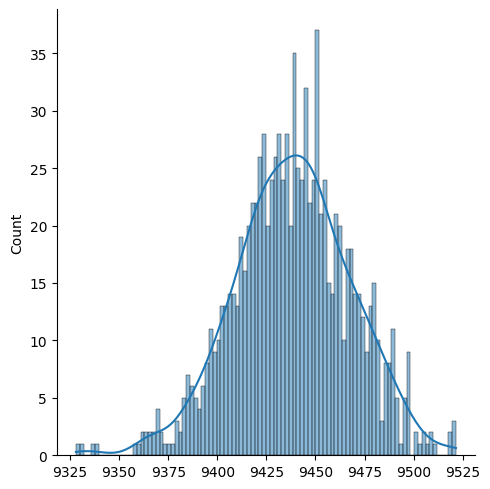

In [24]:
sns.displot(male_sample_mean, kde=True, bins=100)

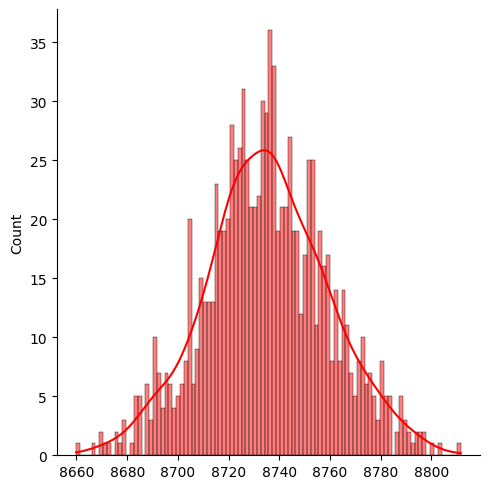

In [25]:
sns.displot(female_sample_mean, kde=True, bins=100, color='red')

## Confidence Interval

In [26]:
# for 95% CI
z=1.96
lower_limit_males= np.mean(male_sample_mean) - z*(np.std(male_sample_mean))
lower_limit_males

np.float64(9380.64458635029)

In [27]:
upper_limit_males= np.mean(male_sample_mean) + z*(np.std(male_sample_mean))
upper_limit_males

np.float64(9496.399416783044)

In [30]:
lower_limit_males , upper_limit_males

(np.float64(9380.64458635029), np.float64(9496.399416783044))

In [28]:
lower_limit_females= np.mean(female_sample_mean) - z*(np.std(female_sample_mean))
lower_limit_females

np.float64(8687.936078450715)

In [29]:
upper_limit_females= np.mean(female_sample_mean) + z*(np.std(female_sample_mean))
upper_limit_females

np.float64(8782.31571181595)

In [31]:
lower_limit_females , upper_limit_females

(np.float64(8687.936078450715), np.float64(8782.31571181595))

[]

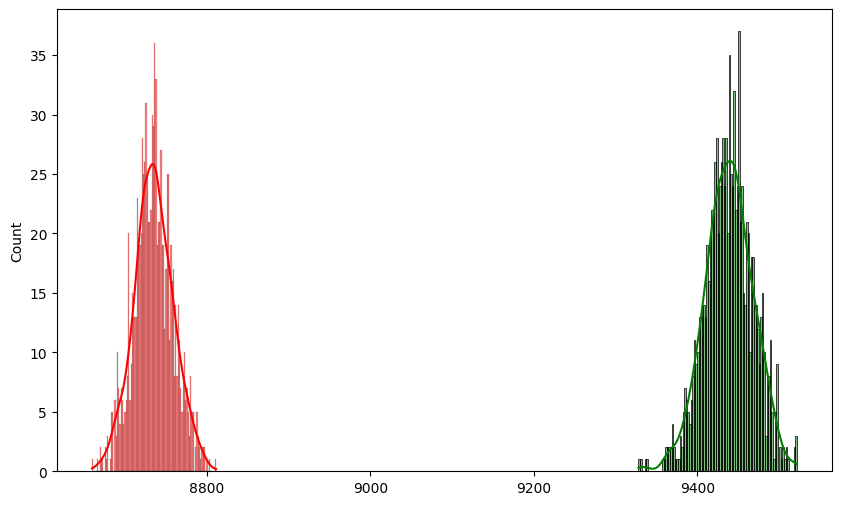

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(male_sample_mean, kde=True, bins=100,color='green')
sns.histplot(female_sample_mean, kde=True, bins=100, color='red')
plt.plot()

# Conclusion

The confidence intervals for the average purchase amount of male and female customers do not overlap, indicating a statistically significant difference in spending behavior during Black Friday. The analysis shows that male customers spend more on average than female customers.

Since the confidence intervals are non-overlapping, the observed difference is unlikely to be due to random chance. Therefore, the null hypothesis is rejected, and we conclude that gender has a meaningful impact on customer spending behavior, with males exhibiting higher average purchase amounts.

# How Walmart Can Leverage This Insight

1. Target High-Value Male Customers

    Launch premium bundles, high-ticket product promotions, and extended warranties aimed at male customers.

    Focus marketing campaigns on categories where male spending is highest (e.g., electronics, appliances).

2. Increase Female Customer Spend

    Introduce personalized discounts, loyalty rewards, and cashback offers to encourage higher spending among female customers.

    Promote bundle offers and value packs aligned with female shopping preferences.

3. Optimize Inventory & Promotions

    Allocate more inventory to male-preferred high-value products during Black Friday.

    Design gender-aware promotional strategies instead of one-size-fits-all discounts.

4. Improve Personalization & Recommendation Systems

    Use gender-based insights to refine product recommendations, email campaigns, and in-app notifications.

    Highlight premium products for male customers while promoting value-driven offers to female customers.

5. Data-Driven Strategic Planning

    Use this insight for future sales events, pricing strategies, and customer segmentation.

    Combine gender insights with other factors (age, occupation, city category) to further improve targeting accuracy.

# Final Business Takeaway

The non-overlapping confidence intervals provide strong statistical evidence that male customers are higher spenders during Black Friday. Walmart can leverage this insight to maximize revenue, improve marketing ROI, and deliver more personalized shopping experiences, while also identifying opportunities to increase spend among female customers.